In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from pymongo import MongoClient
import importEtInsert_data
import equilibrer_les_donnees
import utility
from utility import Liste_categories

# Importation et analyse des données

In [2]:
df=importEtInsert_data.Importation_dataFrame("Data_frame_en",lien_bdd)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494247 entries, 0 to 1500223
Data columns (total 54 columns):
 #   Column                                                 Non-Null Count    Dtype 
---  ------                                                 --------------    ----- 
 0   Texte                                                  1494247 non-null  object
 1   Titre                                                  1494247 non-null  object
 2   Description                                            1494247 non-null  object
 3   building_works                                         1494247 non-null  int64 
 4   studies_consulting_assistance                          1494247 non-null  int64 
 5   transport_and_related_services                         1494247 non-null  int64 
 6   financial_and_insurance_services                       1494247 non-null  int64 
 7   sewerage                                               1494247 non-null  int64 
 8   car_industry_products_and_transp

In [23]:
nb_labele_categorie=utility.nb_exemple_categorie(df)
nb_labele=nb_labele_categorie[3:]
nb_labele

,Label,Nombre_de_textes
3,building_works,62444
4,studies_consulting_assistance,177229
5,transport_and_related_services,36139
6,financial_and_insurance_services,10908
7,sewerage,8570
8,car_industry_products_and_transport_equipment,152221
9,real_estate_missions_and_inspections,18504
10,it_services,54865
11,cleaning_and_hygiene_services,13787
12,building_equipment,14955


In [4]:

def plot_distribution(nb_labele,legende):
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=nb_labele["Label"],
        y=nb_labele["Nombre_de_textes"],
        marker_color='rgb(55, 83, 109)'
    ))

    fig.update_layout(
        title=legende,
        xaxis_title="Catégories",
        yaxis_title="Nombre de documents",
        xaxis_tickangle=-25,
        font=dict(
            family="Arial, sans-serif",
            size=13,
            color="RebeccaPurple"
        )
    )

    fig.show()


In [25]:
plot_distribution(utility.nb_exemple_categorie(df),"Distribution du nombre de documents par catégories dans le dataset anglais")

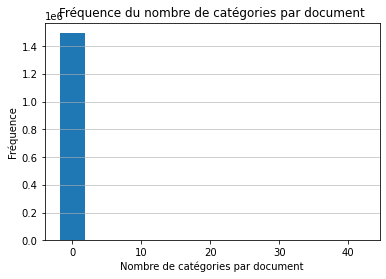

In [156]:
import matplotlib.pyplot as plt


nombre_categories_par_document = df[df.columns[3:]].sum(axis=1)


plt.hist(nombre_categories_par_document, align='left', rwidth=0.8)
plt.xlabel('Nombre de catégories par document')
plt.ylabel('Fréquence')
plt.title('Fréquence du nombre de catégories par document')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [5]:
df[df.columns[3:]].sum(axis=1).value_counts()# 1269937  1269724

1     1269724
2      172690
3       39233
4        7212
5        2527
6        1233
7         645
8         334
9         204
10        100
11         98
13         69
15         35
16         32
12         27
14         19
18         13
17         11
29         11
20          7
45          6
19          5
44          3
25          3
23          2
26          1
31          1
38          1
42          1
dtype: int64

# Amélioration de léquilibre des données  d'entrainements

In [6]:
# Remplace la valeur de description par la valeur de Texte si description est vide 
df.loc[df['Description'] == "", 'Description'] = df['Texte']


In [7]:

#Division des données en données d'entrainement , test et validation 
#Train: (1050156, 54), Test: (225034, 54), Valid: (225034, 54)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=77, test_size=0.30, shuffle=True)
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train: (1045972, 54), Test: (224137, 54), Valid: (224138, 54)


In [29]:
p=utility.nb_exemple_categorie(df_train)
plot_distribution(p,"Distribution du nombre de documents par catégories dans le dataset d'entrainement déséquilibré")

## oversampling & Undersampling

###  Undersampling

In [ ]:
#Diminution des exemples des catégories qui ont plusieurs d'exemple (Under sampling)

train_undersampling=equilibrer_les_donnees.Undersampling(df,13000)

importEtInsert_data.Importation_dataFrame('Train_Oversampling_en')
    

In [8]:
#Création de la colonne qui sera utilisée pour l'entrainement

#train_undersampling['Text'] = train_undersampling['Titre'] +" "+train_undersampling['Description']
df_test['Text'] = df_test['Titre'] +" "+df_test['Description']
df_valid['Text'] = df_valid['Titre'] +" "+df_valid['Description']
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")


Train: (1045972, 54), Test: (224137, 55), Valid: (224138, 55)


In [31]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224138 entries, 59075 to 1487666
Data columns (total 55 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Texte                                                  224138 non-null  object
 1   Titre                                                  224138 non-null  object
 2   Description                                            224138 non-null  object
 3   building_works                                         224138 non-null  int64 
 4   studies_consulting_assistance                          224138 non-null  int64 
 5   transport_and_related_services                         224138 non-null  int64 
 6   financial_and_insurance_services                       224138 non-null  int64 
 7   sewerage                                               224138 non-null  int64 
 8   car_industry_products_and_transport_equ

### Oversampling 

In [ ]:
name_categories=p["Label"][3:54]

#Augmentation du nombre exemples des catégories qui ont moins d'exemple (Over sampling)
equilibrer_les_donnees.Oversampling(train_undersampling,name_categories[38:],count=6000,collection="")


In [166]:

p=utility.nb_exemple_categorie(df_test)
plot_distribution(p,"Distribution du nombre de documents par catégories dans le dataset d'entrainement amélioré")


In [ ]:
df_train=importEtInsert_data.Importation_dataFrame("Train_Oversampling_en")


In [16]:
utility.nb_exemple_categorie(df_train)

,Label,Nombre_de_textes
0,Texte,0
1,Titre,0
2,Description,0
3,building_works,4493
4,studies_consulting_assistance,9777
5,transport_and_related_services,12453
6,financial_and_insurance_services,6041
7,sewerage,6384
8,car_industry_products_and_transport_equipment,12729
9,real_estate_missions_and_inspections,13285


In [18]:
p=utility.nb_exemple_categorie(df_train)
plot_distribution(p,"Distribution du nombre de documents par catégories dans le dataset d'entrainement amélioré")

# Entrainement 

In [1]:
import entrainementDuModeleBert,evaluation_modele

In [2]:
entrainementDuModeleBert.main()


 ################################# Importation des données ##################################### 

Train: (434779, 55), Valid: (216876, 55)

 ################################### Entrainement du modèle ############################## 

Epoch 1/5


100%|██████████| 6778/6778 [37:54<00:00,  2.98it/s]



Temps d'exécution: 207.6740184903145 min

train_loss=0.0389, val_loss=0.0153 train_acc=0.9913, val_acc=0.9959
Epoch 2/5


100%|██████████| 6778/6778 [38:32<00:00,  2.93it/s]



Temps d'exécution: 209.62512625853222 min

train_loss=0.0087, val_loss=0.0126 train_acc=0.9976, val_acc=0.9966
Epoch 3/5


100%|██████████| 6778/6778 [37:58<00:00,  2.98it/s]



Temps d'exécution: 206.26461754242578 min

train_loss=0.0061, val_loss=0.0113 train_acc=0.9983, val_acc=0.9970
Epoch 4/5


100%|██████████| 6778/6778 [38:02<00:00,  2.97it/s]



Temps d'exécution: 206.1990204970042 min

train_loss=0.0047, val_loss=0.0106 train_acc=0.9987, val_acc=0.9971
Epoch 5/5


100%|██████████| 6778/6778 [38:00<00:00,  2.97it/s]



Temps d'exécution: 206.14211399555205 min

train_loss=0.0037, val_loss=0.0110 train_acc=0.9989, val_acc=0.9971


# Evaluation


 ################################# Importation des données ##################################### 



100%|██████████| 6781/6781 [39:28<00:00,  2.86it/s]


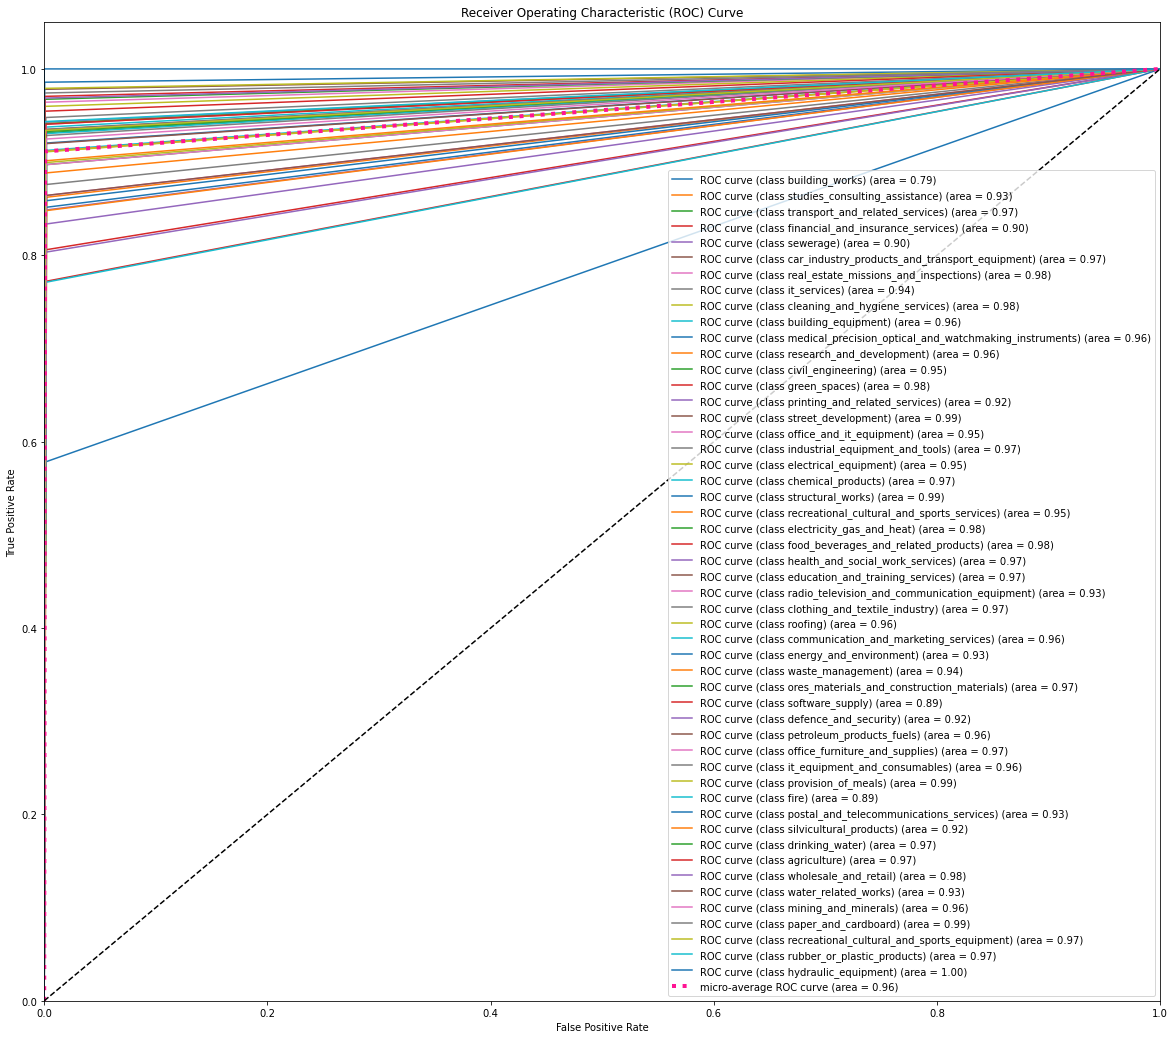

/home/mariam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                       precision    recall  f1-score   support

                                       building_works       0.82      0.58      0.68      2305
                        studies_consulting_assistance       0.98      0.86      0.92     26553
                       transport_and_related_services       0.97      0.93      0.95      5486
                     financial_and_insurance_services       0.91      0.81      0.86      1570
                                             sewerage       0.86      0.80      0.83      1296
        car_industry_products_and_transport_equipment       0.99      0.93      0.96     22861
                 real_estate_missions_and_inspections       0.93      0.96      0.95      2742
                                          it_services       0.97      0.88      0.92      8193
                        cleaning_and_hygiene_services       0.95      0.96      0.95      2015
                                   building_equip

In [3]:
evaluation_modele.main()

# Prédiction

In [5]:
import  predictionModel

predictionModel.main()

Texte      :  Toner Cartridges and Related Services
Prediction :  ['office_and_it_equipment', 'office_furniture_and_supplies']
